## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [58]:
print(x_train.shape[0], 'train samples')

60000 train samples


In [59]:
print(x_test.shape[0], 'test samples')

10000 test samples


In [0]:
""

### Find dimensions of an image in the dataset

In [60]:
print(x_train[0:1].shape, 'train samples')

(1, 28, 28) train samples


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [62]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
#As we have 10 classes ,while doing one hot encoding we will consider num as 10.

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')

x_train /= 255


In [0]:
x_test = x_test.astype('float32')
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [66]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt
import seaborn as sns

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [68]:

    # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

     # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

 # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, mode='auto')
    callback_list = [early_stopping]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [69]:
history = model3.fit(x_train, y_train,epochs=10, batch_size=128, verbose=1, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 75us/step - loss: 0.4286 - acc: 0.8484 - val_loss: 0.3334 - val_acc: 0.8790
Epoch 2/10
54000/54000 [==============================] - 4s 68us/step - loss: 0.2692 - acc: 0.9025 - val_loss: 0.2708 - val_acc: 0.8985
Epoch 3/10
54000/54000 [==============================] - 4s 67us/step - loss: 0.2134 - acc: 0.9215 - val_loss: 0.2568 - val_acc: 0.9070
Epoch 4/10
54000/54000 [==============================] - 4s 69us/step - loss: 0.1716 - acc: 0.9371 - val_loss: 0.2482 - val_acc: 0.9118
Epoch 5/10
54000/54000 [==============================] - 4s 68us/step - loss: 0.1363 - acc: 0.9489 - val_loss: 0.2539 - val_acc: 0.9162
Epoch 6/10
54000/54000 [==============================] - 4s 68us/step - loss: 0.1040 - acc: 0.9622 - val_loss: 0.2704 - val_acc: 0.9177
Epoch 7/10
54000/54000 [==============================] - 4s 68us/step - loss: 0.0762 - acc: 0.9728 - val_loss: 0.2895 - val_acc:

model accuracy : 0.9142


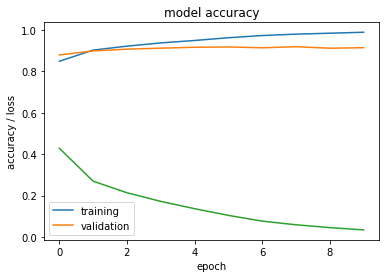

In [72]:
loss,accuracy  = model3.evaluate(x_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [73]:

    # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
   

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=False, mode='auto')
    callback_list = [early_stopping]




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [74]:
history = model3.fit(x_train, y_train,epochs=10, batch_size=128, verbose=1, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 69us/step - loss: 0.4612 - acc: 0.8384 - val_loss: 0.3168 - val_acc: 0.8855
Epoch 2/10
54000/54000 [==============================] - 3s 59us/step - loss: 0.3011 - acc: 0.8921 - val_loss: 0.2695 - val_acc: 0.9015
Epoch 3/10
54000/54000 [==============================] - 3s 58us/step - loss: 0.2545 - acc: 0.9071 - val_loss: 0.2378 - val_acc: 0.9120
Epoch 4/10
54000/54000 [==============================] - 3s 59us/step - loss: 0.2246 - acc: 0.9178 - val_loss: 0.2290 - val_acc: 0.9130
Epoch 5/10
54000/54000 [==============================] - 3s 59us/step - loss: 0.2002 - acc: 0.9259 - val_loss: 0.2292 - val_acc: 0.9160
Epoch 6/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.1761 - acc: 0.9351 - val_loss: 0.2169 - val_acc: 0.9205
Epoch 7/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.1570 - acc: 0.9423 - val_loss: 0.2106 - val_acc:

model accuracy : 0.921


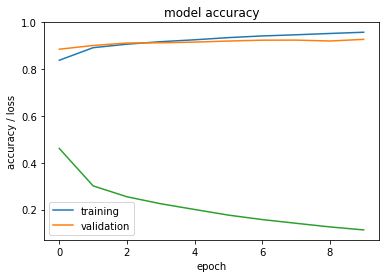

In [75]:
loss,accuracy  = model3.evaluate(x_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

[]

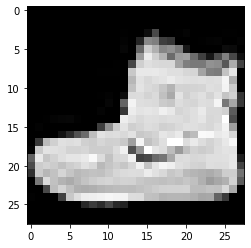

In [96]:
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.plot()

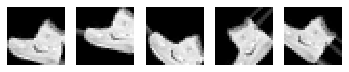

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

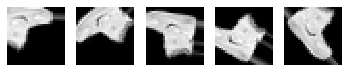

In [97]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [98]:
 # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.15))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.2))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [99]:
model3.fit_generator(datagen.flow(x_train, y_train,batch_size=128),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=20,
                    validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=468, epochs=20)`
  after removing the cwd from sys.path.


Epoch 1/20
468/468 [==============================] - 15s 31ms/step - loss: 1.3296 - acc: 0.5072 - val_loss: 0.8547 - val_acc: 0.6926
Epoch 2/20
468/468 [==============================] - 14s 31ms/step - loss: 1.0227 - acc: 0.6232 - val_loss: 0.7759 - val_acc: 0.7150
Epoch 3/20
468/468 [==============================] - 14s 31ms/step - loss: 0.9329 - acc: 0.6548 - val_loss: 0.7578 - val_acc: 0.7048
Epoch 4/20
468/468 [==============================] - 14s 30ms/step - loss: 0.8732 - acc: 0.6773 - val_loss: 0.7272 - val_acc: 0.7313
Epoch 5/20
468/468 [==============================] - 14s 30ms/step - loss: 0.8371 - acc: 0.6899 - val_loss: 0.7093 - val_acc: 0.7461
Epoch 6/20
468/468 [==============================] - 14s 31ms/step - loss: 0.8019 - acc: 0.7039 - val_loss: 0.7224 - val_acc: 0.7376
Epoch 7/20
468/468 [==============================] - 14s 30ms/step - loss: 0.7810 - acc: 0.7130 - val_loss: 0.7309 - val_acc: 0.7146
Epoch 8/20
468/468 [==============================] - 14s 30ms

model accuracy : 0.8055


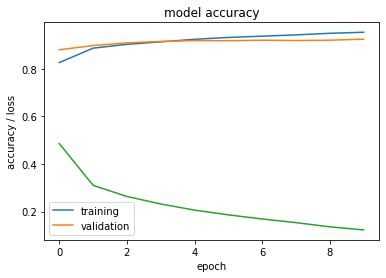

In [100]:
loss,accuracy  = model3.evaluate(x_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

###  Report the final train and validation accuracy

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [118]:
x_train.shape

(50000, 32, 32, 3)

In [119]:
y_train.shape

(50000, 1)

In [0]:
x_train = x_train.astype('float32')

x_train /= 255

In [0]:
x_test = x_train.astype('float32')

x_test /= 255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

# Prepare the generator


### **Prepare/fit the generator.**

In [0]:
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

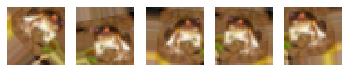

In [147]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()